In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("House_prediction.csv")

In [6]:
#Brief look of dataset
print(df.head(5))

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

In [7]:
#statistical summary of the columns
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [9]:
df["city"].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [10]:
#Creating citywise dataset
city_wise=pd.DataFrame(columns=["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)",
                                "fire insurance (R$)","total (R$)"],index=list(df["city"].unique()))
for i in city_wise.index:
    city_wise.loc[i]=df[df.city==i].mean()

In [11]:
print(city_wise)

                   area    rooms bathroom parking spaces hoa (R$)  \
São Paulo       158.899  2.55886  2.46764        1.87753  1169.63   
Porto Alegre    103.609  2.14082   1.7259        1.04443  491.619   
Rio de Janeiro  105.348  2.24384  1.75616       0.744171  1079.43   
Campinas        137.562  2.35522  1.96014        1.55803  628.923   
Belo Horizonte  207.412  3.02067  2.40223        1.95548   2324.2   

               rent amount (R$) property tax (R$) fire insurance (R$)  \
São Paulo               4652.79           495.702             62.4289   
Porto Alegre             2337.7           124.022             36.4258   
Rio de Janeiro           3232.9           256.853              42.483   
Campinas                2364.29           147.658              32.388   
Belo Horizonte          3664.13           272.782             53.6757   

               total (R$)  
São Paulo         6380.83  
Porto Alegre      2989.78  
Rio de Janeiro    4611.68  
Campinas          3173.28  
Belo H

Text(0.5, 1.0, 'city wise house area avg')

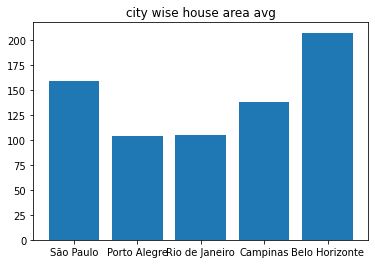

In [12]:
# MEAN AREA OF HOUSES BY CITY
plt.bar(city_wise.index,city_wise["area"])
plt.title("city wise house area avg")


Text(0.5, 1.0, 'city wise house rent (R$) avg')

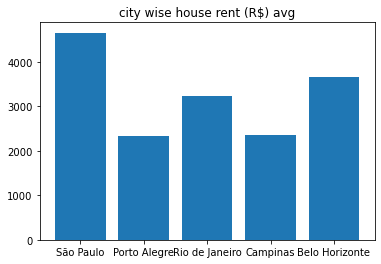

In [13]:
# MEAN RENT OF HOUSES CITYWISE
plt.bar(city_wise.index,city_wise["rent amount (R$)"])
plt.title("city wise house rent (R$) avg")

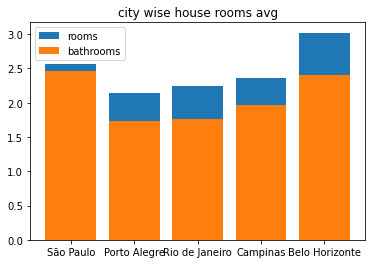

In [45]:
# MEAN NUMBER OF ROOMS AND BATHROOMS CITYWISE
plt.bar(city_wise.index,city_wise["rooms"],label="rooms")
plt.bar(city_wise.index,city_wise["bathroom"],label="bathrooms")
plt.title("city wise house rooms avg")
plt.legend()

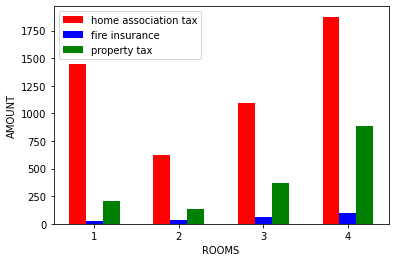

In [44]:
#Rooms vs hoa,fire insurance,property tax
x1=np.arange()
x2=[x+0.2 for x in x1]
x3=[x+0.2 for x in x2]
plt.bar(x1,[df[df["rooms"]==1]["hoa (R$)"].mean(),df[df["rooms"]==2]["hoa (R$)"].mean(),
                           df[df["rooms"]==3]["hoa (R$)"].mean(),df[df["rooms"]==4]["hoa (R$)"].mean()],
       width=0.2,color="r",label="home association tax")
plt.bar(x2,[df[df["rooms"]==1]["fire insurance (R$)"].mean(),df[df["rooms"]==2]["fire insurance (R$)"].mean(),
                           df[df["rooms"]==3]["fire insurance (R$)"].mean(),df[df["rooms"]==4]["fire insurance (R$)"].mean()],
       width=0.2,color="b",label="fire insurance")
plt.bar(x3,[df[df["rooms"]==1]["property tax (R$)"].mean(),df[df["rooms"]==2]["property tax (R$)"].mean(),
                           df[df["rooms"]==3]["property tax (R$)"].mean(),df[df["rooms"]==4]["property tax (R$)"].mean()],
       width=0.2,color="g",label="property tax")
plt.xticks([ r + 0.2 for r in range(4)],
        ['1','2','3','4'])
plt.xlabel("ROOMS")
plt.ylabel("AMOUNT")
plt.legend()